['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


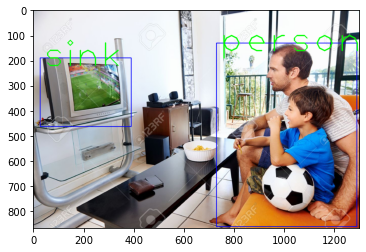

In [2]:
import cv2 
import matplotlib.pyplot as plt

config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt' #구성 파일, 알고리즘에 관한 모든 설정 
frozen_model='frozen_inference_graph.pb' #훈련된 모델 

model =cv2.dnn_DetectionModel(frozen_model,config_file)

classLabels = []
file_name='Labels.txt' #알고리즘이 감지할 수 있는 객체의 이름을 포함
with open(file_name,'rt') as fpt:
    classLabels =fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())


print(classLabels)
len(classLabels)

model.setInputSize(320,320) 
model.setInputScale(1.0/127.5) #255/2
model.setInputMean((127.5,127.5,127.5)) #mobilenet => [-1,1]
model.setInputSwapRB(True) # 밑에 rgb 바꿀 필요 없다고함 .  

# read an image

img = cv2.imread('wooseokk.jpg')
plt.imshow(img)

ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)

ClassIndex 

classLabels[71]

bbox

font_scale= 10
font =cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2) #rectangle 색 블루 
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))





In [4]:
# video Demo

cap = cv2.VideoCapture("hhh.mp4")
#cap = cv2.VideoCapture(1)

#check if the video is opened correctly
if not cap.isOpened():
    cap= cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open video")
    
font_scale = 3
font =cv2.FONT_HERSHEY_PLAIN
while True:
    ret,frame =cap.read()
    
    ClassIndex,confidence,bbox=model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    print(bbox)
    if (len(ClassIndex)!=0):        
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2) #rectangle 색 블루 
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow('Object Detection Tutorial',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyALLWindows()

[[62]
 [72]]
[[174 480 215 301]
 [ 71 342 128 126]]
[[62]
 [72]]
[[177 482 211 311]
 [ 73 342 130 127]]
[[62]
 [72]]
[[182 484 215 291]
 [ 74 341 133 128]]
[[62]
 [72]]
[[183 487 218 294]
 [ 77 344 130 124]]
[[62]
 [72]]
[[185 488 218 302]
 [ 79 339 131 130]]
[[62]
 [72]]
[[187 489 215 296]
 [ 83 344 126 126]]
[[62]
 [72]]
[[190 494 217 291]
 [ 86 343 124 127]]
[[62]
 [72]
 [84]
 [84]]
[[190 484 219 315]
 [ 87 346 126 124]
 [ 75 320  30  22]
 [ 69 263  33  28]]
[[84]
 [62]
 [84]
 [72]]
[[ 74 264  24  26]
 [194 497 227 304]
 [ 76 322  26  20]
 [ 88 347 126 123]]
[[84]
 [62]
 [84]]
[[ 74 261  28  29]
 [198 497 222 305]
 [ 95 310  23  23]]
[[62]
 [67]]
[[205 493 212 280]
 [  0 441 299 277]]
[[62]
 [67]]
[[206 489 215 302]
 [  0 445 305 267]]
[[62]
 [62]
 [67]
 [84]]
[[207 486 219 316]
 [100 342 132 128]
 [  0 443 314 272]
 [ 89 316  32  21]]
[[72]
 [62]
 [84]
 [67]]
[[111 342 123 130]
 [214 477 220 305]
 [ 96 320  32  20]
 [  0 446 329 339]]
[[62]
 [84]
 [72]]
[[216 477 222 330]
 [ 52 259

[[62]
 [84]
 [84]
 [84]
 [84]]
[[204 418 115 185]
 [344 347   9  34]
 [323 352   9  25]
 [341 303  10  27]
 [319 401  18  22]]
[[62]
 [84]
 [84]
 [84]
 [84]]
[[216 419 113 183]
 [343 343   9  36]
 [340 308  11  26]
 [362 348  11  35]
 [334 394  21  22]]
[[62]
 [84]
 [84]
 [84]
 [84]
 [84]]
[[215 412 108 196]
 [344 342   9  34]
 [367 348   8  34]
 [345 306  10  28]
 [333 399  24  23]
 [345 277  14  36]]
[[62]
 [84]
 [84]
 [84]
 [84]]
[[216 414 114 178]
 [369 348  10  34]
 [346 346   9  27]
 [338 401  21  22]
 [381 347   8  34]]
[[62]
 [84]
 [82]
 [84]
 [84]]
[[239 411 114 193]
 [366 343  10  33]
 [  0 367 128 293]
 [387 350  10  33]
 [366 310  10  25]]
[[62]
 [82]
 [84]
 [82]
 [84]
 [84]
 [84]]
[[235 410 114 190]
 [  0 367 132 294]
 [368 343  10  29]
 [142 358  76 171]
 [352 399  32  24]
 [391 351  10  30]
 [369 310  10  27]]
[[62]
 [84]
 [84]
 [84]
 [84]]
[[241 412 115 181]
 [393 345  10  36]
 [371 345   9  27]
 [363 401  21  21]
 [404 345   8  37]]
[[62]
 [84]
 [84]
 [84]
 [82]
 [82]]

KeyboardInterrupt: 